## Creation de la série des noms de dominante

In [2]:
import pandas as pd
dominantes= {'ASR':'Architecture et sécurité des réseaux',
             'BDTN':'Big Data pour la transformation du numérique',
             'IA-IR':"Ingénieur d'affaire : informatique et réseaux",
             'ICOM':"Ingénieur télécoms"}
dominantesSerie = pd.Series(dominantes)

In [3]:
dominantesSerie.index



Index(['ASR', 'BDTN', 'IA-IR', 'ICOM'], dtype='object')

In [4]:
dominantesSerie

ASR               Architecture et sécurité des réseaux
BDTN      Big Data pour la transformation du numérique
IA-IR    Ingénieur d'affaire : informatique et réseaux
ICOM                                Ingénieur télécoms
dtype: object

## Creation de la série contenant les départements 

In [5]:
departements = {'ASR':"Technologies de l'information et de la communication",
                'BDTN':"Technologies de l'information et de la communication",
                'IA-IR':"Technologies de l'information et de la communication",
                'ICOM':"Electronique et telecommunication"}

departementsSerie=pd.Series(departements, index=dominantesSerie.index)


## Création du dataframe liant dominantes et départements

In [6]:
domdepdf = pd.DataFrame(dominantesSerie,columns=["Dominante"])
domdepdf["Departement"]=departementsSerie
domdepdf

,Dominante,Departement
ASR,Architecture et sécurité des réseaux,Technologies de l'information et de la communi...
BDTN,Big Data pour la transformation du numérique,Technologies de l'information et de la communi...
IA-IR,Ingénieur d'affaire : informatique et réseaux,Technologies de l'information et de la communi...
ICOM,Ingénieur télécoms,Electronique et telecommunication


In [7]:
domdepdf.iloc([1,2])

## Création du dataframe des élèves

In [8]:
eleve1 = pd.Series({'Nom':'Vollmar','Prenom':'Lucas','Dominante':'IA-IR'})
eleve2 = pd.Series({'Nom':'Saint-Pierre','Prenom':'Dimitri','Dominante':'BDTN'})
eleve3 = pd.Series({'Nom':'Adjakpa','Prenom':'Cédric','Dominante':'ASR'})
eleve4 = pd.Series({'Nom':'Mouthoud','Prenom':'Maud','Dominante':'ICOM'})
eleve5 = pd.Series({'Nom':'Achiraf','Prenom':'Achif','Dominante':'ASR'})

elevesdf = pd.DataFrame([eleve1,eleve2,eleve3,eleve4,eleve5],index=['Eleve1','Eleve2','Eleve3','Eleve4','Eleve5'])
elevesdf

,Dominante,Nom,Prenom
Eleve1,IA-IR,Vollmar,Lucas
Eleve2,BDTN,Saint-Pierre,Dimitri
Eleve3,ASR,Adjakpa,Cédric
Eleve4,ICOM,Mouthoud,Maud
Eleve5,ASR,Achiraf,Achif


## Création d'une série donnant les départements correspondants aux dominantes du dataframe

In [9]:
corresponds = domdepdf.Departement[elevesdf.Dominante]
corresponds

Dominante
IA-IR    Technologies de l'information et de la communi...
BDTN     Technologies de l'information et de la communi...
ASR      Technologies de l'information et de la communi...
ICOM                     Electronique et telecommunication
ASR      Technologies de l'information et de la communi...
Name: Departement, dtype: object

## Calcul de la répartition des dominantes dans le PING

In [10]:
percents = pd.value_counts(corresponds)/corresponds.count()*100
percents

Technologies de l'information et de la communication    80.0
Electronique et telecommunication                       20.0
Name: Departement, dtype: float64

## Sauvegarde du fichier sous format csv

In [11]:
percents.to_csv("percents.csv",',')

## Affichage graphique des pourcentages (histogramme)

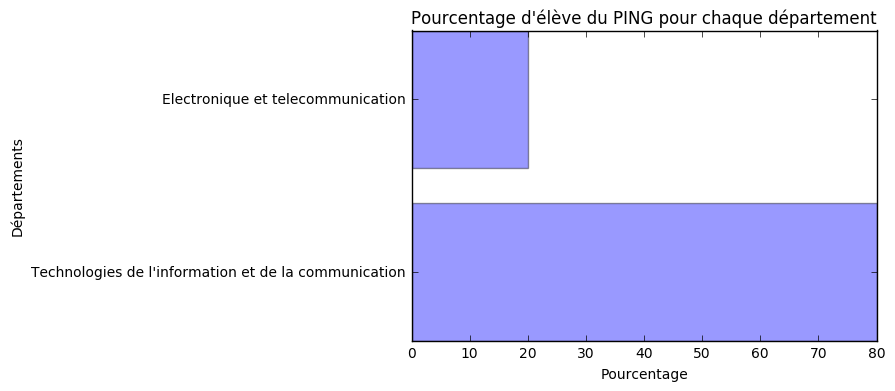

In [28]:
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(percents))

plt.barh(y_pos, percents, align='center', alpha=0.4)
plt.yticks(y_pos, percents.index)
plt.xlabel('Pourcentage')
plt.ylabel('Départements')
plt.title("Pourcentage d'élève du PING pour chaque département")

plt.show()

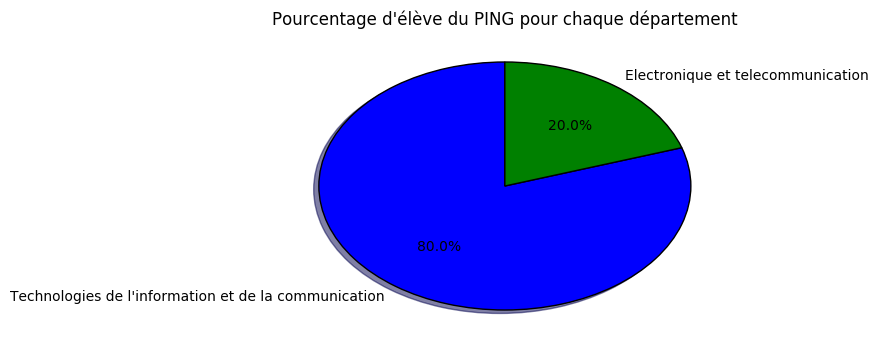

In [29]:
import matplotlib.pyplot as plt
plt.pie(percents,labels=percents.index, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Pourcentage d'élève du PING pour chaque département")
plt.show()